<a href="https://colab.research.google.com/github/oviyajay/ML-Final-Project/blob/main/MLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import os 
import cv2
!pip install tflearn
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

#Members:...
#https://blog.paperspace.com/image-captioning-with-ai/
#image preprocessing

# TEST_W_MASK="https://github.com/oviyajay/ML-Final-Project/tree/main/maskdata/maskdata/test/with_mask"
# TEST_WO_MASK="https://github.com/oviyajay/ML-Final-Project/tree/main/maskdata/maskdata/test/without_mask"
# TRAIN_W_MASK="https://github.com/oviyajay/ML-Final-Project/tree/main/maskdata/maskdata/train/with_mask"
# TRAIN_WO_MASK="https://github.com/oviyajay/ML-Final-Project/tree/main/maskdata/maskdata/train/without_mask"

!git clone https://github.com/oviyajay/ML-Final-Project

#label the images
#create training data and test data 


     |████████████████████████████████| 112kB 5.2MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=5978b6a05262b67c397c4f7733d3b9891958b676ee59d5f7e9d0eb04f29f8812
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term
Cloning into 'ML-Final-Project'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 955 (delta 2), reused 0 (delta 0), pack-reused 946
Receiving objects: 100% (955/955), 109.16 MiB | 34.89 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
#Eric 
train_path = "/content/ML-Final-Project/maskdata/maskdata/train/"
os.listdir(train_path)

test_path = "/content/ML-Final-Project/maskdata/maskdata/test/"
os.listdir(test_path)



['with_mask', 'without_mask']

In [3]:
label_names = ['without_mask', 'with_mask']
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'withMaskvsnoMask-{}-{}.model'.format(LR, '6conv-basic')

def load_data(path):
  data = []

  for label in label_names:
    for filename in os.listdir(os.path.join(path, label)):
    
      img_file = os.path.join(path, label, filename)
       
      img = cv2.imread(img_file, cv2.IMREAD_COLOR)    
      

      # resizing the image for processing
      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), )
      

      #withmask: id = 1, withoutmask: id = 0
      label_id = label_names.index(label)
  

      # final step-forming the training data list with numpy array of the images 
      data.append([np.array(img), np.array(label_id)]) 
  return data



In [4]:
train_data = load_data(train_path)
print(len(train_data))
test_data = load_data(test_path)


616


In [5]:
# train is a list of [x, y] pairs
#train_x = [i[0] for i in train_data]  #i[0] is a numpy array that is the size/shape of a single image
print(len(train_data))
train_x = [i[0] for i in train_data]
train_x = np.array(train_x, dtype=float).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # num_image, width, height, channels
train_y = [i[1] for i in train_data]
train_y = np.array(train_y, dtype=float)
#train_y = tf.keras.utils.to_categorical(train_y)
test_x = [i[0] for i in test_data]
test_x = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
test_y = [i[1] for i in test_data]
test_y = np.array(test_y, dtype=float)
print(train_x.shape)
print(train_y.shape)


616
(616, 50, 50, 3)
(616,)


In [6]:
#Iant
#tf.reset_default_graph() 
cnn = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 

#convolution and pooling operations
#as for the arguments, (convolutional network, numbers of channels, filter size(if one number 'x' is passed, then both dimensions are 'x' ), activation function used)
#in our case, we're starting with 16 channels, gradually working up to 128. By convention, the number of channels gradually increase or stay the same as it works its way further into the CNN
#filter size changed from 5x5 to 3x3

cnn = conv_2d(cnn, 16, 3, activation ='relu') 
cnn = max_pool_2d(cnn, 3) 

cnn = conv_2d(cnn, 32, 3, activation ='relu') 
cnn = max_pool_2d(cnn, 3) 
  
cnn = conv_2d(cnn, 64, 3, activation ='relu') 
cnn = max_pool_2d(cnn, 3) 
  
cnn = conv_2d(cnn, 128, 3, activation ='relu') 
cnn = max_pool_2d(cnn, 3) 
  
cnn = fully_connected(cnn, 1024, activation ='relu') 
cnn = dropout(cnn, 0.8) 
  
cnn = fully_connected(cnn, 2, activation ='softmax') 
cnn = regression(cnn, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(cnn, tensorboard_dir ='log') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [72]:
#Oviya
#model.fit({'input': train_x}, {'targets': train_y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}),snapshot_step = 500, show_metric=True,run_id = MODEL_NAME )
#model.save(MODEL_NAME)

#--------------------using KERAS------------------------------#

#create our CNN Model

class MyModel(tf.keras.Model):
  def __init__(self):
    #define layers
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(5,5),activation=tf.nn.relu, input_shape=(IMG_SIZE,IMG_SIZE,3))
    self.max1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    self.conv2 = tf.keras.layers.Conv2D(64, (5,5), activation = 'relu')
    self.max2=tf.keras.layers.MaxPooling2D(pool_size=(2,2))
  
  def call(self,inputs):
    #first convolution layer
    convOne = (self.conv1)(inputs)
    maxOne = (self.max1)(convOne)
    #second convolution layer
    convTwo = (self.conv2)(maxOne)
    maxTwo = (self.max2)(convTwo)
    #flatten the array
    flat = tf.keras.layers.Flatten()(maxTwo)
    #hidden layer
    hiddenLayer = tf.keras.layers.Dense(75, activation = 'relu')(flat) 
    #output layer
    outputLayer = tf.keras.layers.Dense(2, activation ='softmax')(hiddenLayer)



    return outputLayer

#call model and send in inputs 
#input layer
#inputs = tf.keras.Input(shape=(3,), tensor=train_x)
model = MyModel()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
history = model.fit(train_x,train_y, batch_size= 100, epochs=20)
#_,accuracy = model.evaluate(train_x,train_y)




Train on 616 samples
Epoch 1/20
616/616 [==============================] - 2s 4ms/sample - loss: 1869.9061 - acc: 0.4416
Epoch 2/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7934 - acc: 0.5373
Epoch 3/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7791 - acc: 0.6786
Epoch 4/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7757 - acc: 0.6932
Epoch 5/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7760 - acc: 0.6672
Epoch 6/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7748 - acc: 0.6477
Epoch 7/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7766 - acc: 0.6347
Epoch 8/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7763 - acc: 0.6169
Epoch 9/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7765 - acc: 0.5828
Epoch 10/20
616/616 [==============================] - 2s 4ms/sample - loss: 0.7777 - acc: 0.5877
Epoch

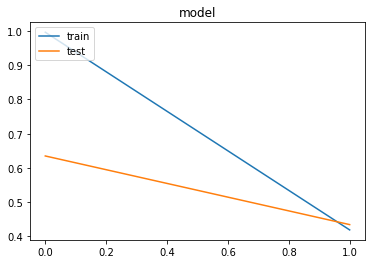

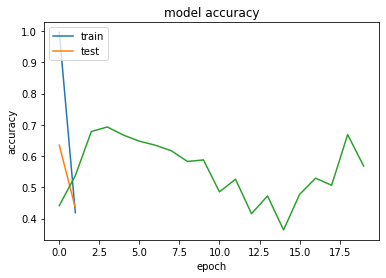

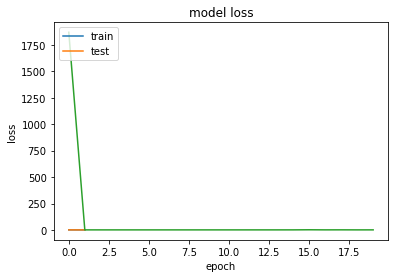

In [73]:
#Eric
import matplotlib.pyplot as plt

plt.plot(model.evaluate(train_x,train_y))
plt.plot(model.evaluate(test_x,test_y))
plt.title('model')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.evaluate(train_x,train_y))
plt.plot(model.evaluate(test_x,test_y))
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.evaluate(train_x,train_y))
plt.plot(model.evaluate(test_x,test_y))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()